<a href="https://colab.research.google.com/github/AbakahAlexander/Fashion-Recognition-CNN-model./blob/main/CNNfashinrec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from keras.models import Sequential, load_model, Model
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Activation, Dropout
from tensorflow.python.keras.utils import np_utils
from keras.datasets import fashion_mnist

from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.layers import LeakyReLU


# Rest of the code goes here

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
print('Training data shape: ', x_train.shape, y_train.shape)
print('Testing data shape : ', x_test.shape, y_test.shape)

Training data shape:  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

Text(0.5, 1.0, 'Ground Truth : 9 ')

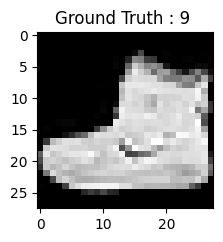

In [ ]:
plt.figure(figsize=[5,5])

plt.subplot(121)
plt.imshow(x_train[0], cmap='gray')
plt.title('Ground Truth : {} ' .format(y_train[0]))

Text(0.5, 1.0, 'Ground truth : 9 ')

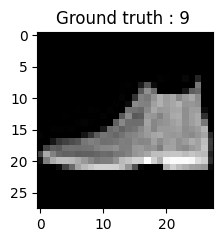

In [ ]:

plt.figure(figsize=[5,5])

plt.subplot(121)
plt.imshow(x_test[0], cmap='gray')
plt.title('Ground truth : {} ' .format(y_test[0]))

In [ ]:
batch_size = 64
epochs = 20
nclasses =10

Network Architecture

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation='linear', input_shape=(28,28,1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D((2,2), padding='same'))
model.add(Conv2D(64, (3,3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D((2,2), padding='same'))
model.add(Conv2D(128,(3,3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D((2,2), padding='same'))

model.add(Flatten())

model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(nclasses, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_21 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                

In [ ]:
train_label.shape

(48000, 10)

In [ ]:
history = model.fit(X_train, train_label,
          epochs = epochs,
          batch_size = batch_size,
          verbose = 1,
          validation_data = (X_valid, valid_label))

Epoch 1/20
750/750 [==============================] - 83s 111ms/step - loss: 0.4173 - accuracy: 0.8470 - val_loss: 0.3523 - val_accuracy: 0.8738
Epoch 2/20
750/750 [==============================] - 79s 105ms/step - loss: 0.2837 - accuracy: 0.8965 - val_loss: 0.2737 - val_accuracy: 0.8996
Epoch 3/20
750/750 [==============================] - 78s 103ms/step - loss: 0.2370 - accuracy: 0.9144 - val_loss: 0.2530 - val_accuracy: 0.9089
Epoch 4/20
750/750 [==============================] - 80s 107ms/step - loss: 0.2055 - accuracy: 0.9244 - val_loss: 0.2299 - val_accuracy: 0.9168
Epoch 5/20
750/750 [==============================] - 84s 112ms/step - loss: 0.1799 - accuracy: 0.9333 - val_loss: 0.2239 - val_accuracy: 0.9215
Epoch 6/20
750/750 [==============================] - 79s 106ms/step - loss: 0.1581 - accuracy: 0.9413 - val_loss: 0.2285 - val_accuracy: 0.9215
Epoch 7/20
750/750 [==============================] - 79s 106ms/step - loss: 0.1345 - accuracy: 0.9503 - val_loss: 0.2417 - val_ac

In [ ]:
model.evaluate(X_test, Y_test, verbose =0)

[0.5230408906936646, 0.9182999730110168]

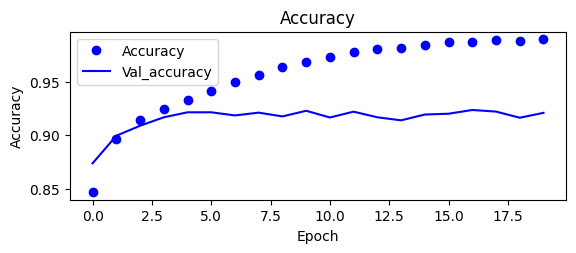

In [ ]:
plt.subplot(2,1,2)

plt.plot(history.history['accuracy'], 'bo')
plt.plot(history.history['val_accuracy'], 'b')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(labels=['Accuracy', 'Val_accuracy'], loc='upper left')

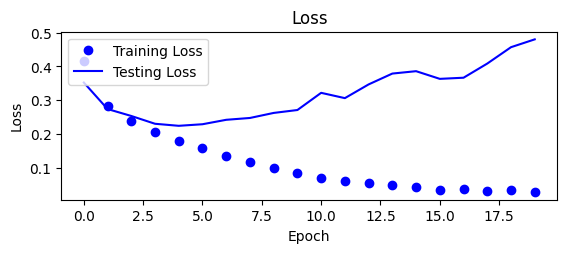

In [ ]:
plt.subplot(2,1,2)

plt.plot(history.history['loss'], 'bo')
plt.plot(history.history['val_loss'], 'b')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(labels=['Training Loss', 'Testing Loss'], loc='upper left')

Adding Dropout to reduce overfitting

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation='linear', input_shape=(28,28,1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D((2,2), padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3,3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D((2,2), padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D((2,2), padding='same'))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))
model.add(Dense(nclasses, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_24 (LeakyReLU)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_25 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                      

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history_dropout = model.fit(X_train, train_label,
                            verbose = 1,
                            batch_size = batch_size,
                            epochs = epochs,
                            validation_data =(X_valid, valid_label))

Epoch 1/20
750/750 [==============================] - 85s 112ms/step - loss: 0.5924 - accuracy: 0.7806 - val_loss: 0.3658 - val_accuracy: 0.8669
Epoch 2/20
750/750 [==============================] - 84s 112ms/step - loss: 0.3795 - accuracy: 0.8609 - val_loss: 0.3239 - val_accuracy: 0.8828
Epoch 3/20
750/750 [==============================] - 85s 113ms/step - loss: 0.3288 - accuracy: 0.8782 - val_loss: 0.2809 - val_accuracy: 0.8957
Epoch 4/20
750/750 [==============================] - 84s 112ms/step - loss: 0.3057 - accuracy: 0.8876 - val_loss: 0.2627 - val_accuracy: 0.9022
Epoch 5/20
750/750 [==============================] - 85s 113ms/step - loss: 0.2857 - accuracy: 0.8933 - val_loss: 0.2646 - val_accuracy: 0.9013
Epoch 6/20
750/750 [==============================] - 84s 112ms/step - loss: 0.2701 - accuracy: 0.9007 - val_loss: 0.2512 - val_accuracy: 0.9069
Epoch 7/20
750/750 [==============================] - 84s 111ms/step - loss: 0.2624 - accuracy: 0.9030 - val_loss: 0.2473 - val_ac

In [ ]:
model.evaluate(X_test, Y_test, verbose=1)

313/313 [==============================] - 5s 17ms/step - loss: 0.2183 - accuracy: 0.9201


[0.2183428406715393, 0.9200999736785889]

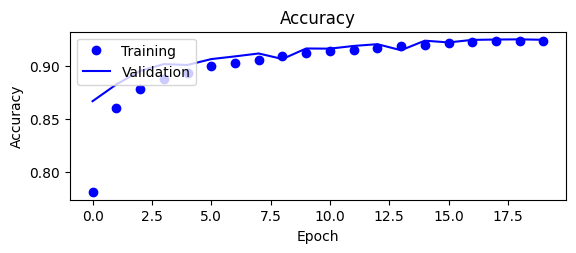

In [ ]:
plt.subplot(2,1,2)

plt.plot(history_dropout.history['accuracy'], 'bo')
plt.plot(history_dropout.history['val_accuracy'], 'b')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(labels=['Training', 'Validation'], loc="upper left")

In [ ]:
predicted_classes = model.predict(X_test)

313/313 [==============================] - 5s 15ms/step


In [ ]:
predicted_classes = np.argmax(np.round(predicted_classes), axis=1)

In [ ]:
predicted_classes.shape, y_test.shape

((10000,), (10000,))

<ipython-input-115-2cb6430474ec>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


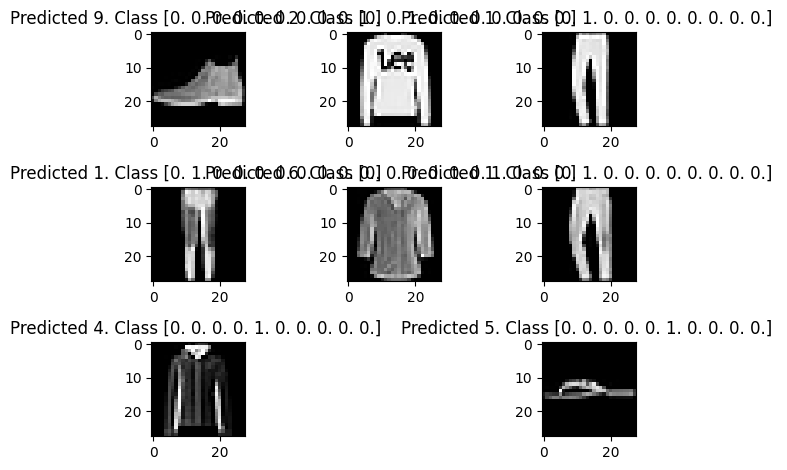

In [ ]:
correct = np.where(predicted_classes == y_test)[0]

for i, correct in enumerate(correct[:9]):
  plt.subplot(3,3,i+1)
  plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
  plt.title('Predicted {}. Class {} '.format(predicted_classes[correct], Y_test[correct]))
  plt.tight_layout()

<ipython-input-116-5f194277aa50>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


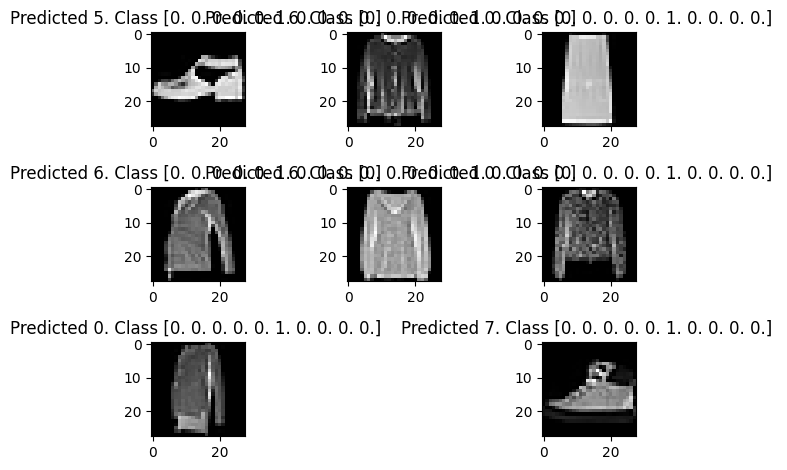

In [ ]:
incorrect = np.where(predicted_classes != y_test)[0]

for i, incorrect in enumerate(incorrect[:9]):
  plt.subplot(3,3,i+1)
  plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
  plt.title('Predicted {}. Class {} '.format(predicted_classes[incorrect], Y_test[correct]))
  plt.tight_layout()

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Class {}'.format(i) for i in range(nclasses)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.77      0.90      0.83      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.91      0.86      0.88      1000
     Class 3       0.96      0.88      0.92      1000
     Class 4       0.87      0.88      0.87      1000
     Class 5       1.00      0.97      0.98      1000
     Class 6       0.78      0.75      0.76      1000
     Class 7       0.96      0.98      0.97      1000
     Class 8       0.99      0.99      0.99      1000
     Class 9       0.97      0.98      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [ ]:
# silent all warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
import warnings
warnings.filterwarnings('ignore')
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model_save_name = 'CNNfashion.keras'
path = F"/content/drive/My Drive/Models/{model_save_name}"
model.save(path)
print("Contents of My Drive:", os.listdir('/content/gdrive/My Drive/'))

Contents of My Drive: ['fashion_rec.h5', 'CNNfashion.h5', 'CNNfashion.keras']
